# Dissatisfied or Just Moving On — Analyzing Exit Surveys in Australia.

In this project, the exit surveys of two organizations, [the Department of Education, Training and Employment (DETE)](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and the [Technical and Further Education (TAFE) institute](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) in Queensland, Australia will be analyzed. The data from both surveys will be cleaned for analysis individually and combined to determine if employees are leaving due to dissatisfaction with the job or if they simply leaving of their own accord. 

The goal of the project is to answer two questions presented by the stakeholders: 
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Summary of Results

After completing the analysis for the datasets, the conclusions that were drawn were that individuals with 7 or more years of employment were more likely to leave due to disatisfaction of some sort with their job. This was seen throughout and irregardless of the company or combined. 

For more details, please refer to the full analysis below. 

# Exploring Existing Data to Compare Datasets Before Combination

Before cleaning the data sets, let's explore both to see what sort of data is being worked with, as standardization might need to be done to be able to combine our data into one properly. 

Below, a quick exploration of both dete_survey.csv and tafe_survey.csv will be done to see if there are any similarities between columns.

In [1]:
# Read in the data
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

# Quick exploration of the Columns and their types for the dete survey
print(dete_survey.info())
print(dete_survey.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

A quick look into the data sets can show what needs to be cleaned and standardized.

In [2]:
#Quick exploration of the Columns and their types for the tafe survey
print(tafe_survey.info())
print(tafe_survey.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

Also, want to check how many null values exist in each column

In [3]:
# Checking how many null values are in each column
print(dete_survey.isnull().sum())

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [4]:
# Checking how many null values are in each column
print(tafe_survey.isnull().sum())

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64


Explore the sections of the business.

In [5]:
# Exploring the different fields of business 
dete_survey['Business Unit'].value_counts()

Education Queensland                          54
Information and Technologies                  26
Training and Tertiary Education Queensland    12
Other                                         11
Human Resources                                6
Corporate Strategy and Peformance              5
Early Childhood Education and Care             3
Policy, Research, Legislation                  2
Infrastructure                                 2
Indigenous Education and Training Futures      1
Calliope State School                          1
Corporate Procurement                          1
Finance                                        1
Pacific Pines SHS                              1
Name: Business Unit, dtype: int64

Based off the information provided in both databases, one object of interest that needs correction is that there are missing values in dete_survey database that aren't represented as NaN but rather 'Not Stated. Both databases also contain many columns that aren't needed for our analysis as well as columns that are similar in nature that need to be standardized before both databases are combined into one. Another thing to note is that multiple columns indicate that an employee resigned becuase they were dissatisfied. 

# Identifying Missing Values & Dropping Unnecessary Columns

In [6]:
# Read the data back into pandas to correct missing values
dete_survey =  pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

In [7]:
# Updated both data sets to remove unnecessary columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis =1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)


Here, the dete_survey.csv file was read back into pandas again so the 'Not Stated' values are changed NaN. Next, columns were dropped from both surveys that won't be of need to perform the analysis. 

# Streamlining Column Names 

Now that the unnecessary columns were removed and missing values are properly displayed, the column names for both data sets will be cleaned and standardized for combination into one dataset. 

In [8]:
# Standardizing the columns in dete_survey
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [9]:
# Update columns to match the DETE dataset
cols_updated = {'Record ID':'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated.rename(columns=cols_updated,inplace=True)


In [10]:
# checking if the update was made
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [11]:
# Same as above
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Changes were made to both dete_survey_updated and tafe_survey_updated to clean up their respective column names. For the dete survey, I used vectorized string methods to update the columns name to make sure all were standardized such as making sure all capitalization are lowercase, removing any trailing whitespace, and replacing spaces with underscores. 

For the tafe survey, column names were updated by manually renaming all the columns. To do this, a dictionary was made to list the changes needed and using the rename method to apply it to the tafe survey columns.

# Time to Filter

Now that column names are clean, I can begin to filter out resignations from each company since that is all I need for this part of the analysis.

In [12]:
# print counts for values in the seperation type columns
print(dete_survey_updated['separationtype'].value_counts())
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


Looking at the value counts above, I will isolate the seperation by resignation only.

In [13]:
# Isolating the resignation reason for seperation type 
dete_resignations = dete_survey_updated[(dete_survey_updated['separationtype'] == 'Resignation-Other reasons') |
                                       (dete_survey_updated['separationtype'] == 'Resignation-Other employer') |
                                       (dete_survey_updated['separationtype'] == 'Resignation-Move overseas/interstate')].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy() # copy to avoid SettingWithCopy Warning

In [14]:
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,810,Resignation-Other reasons,12/2013,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN
815,817,Resignation-Other employer,01/2014,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,21-25,NaN,NaN,NaN,NaN,NaN
816,818,Resignation-Move overseas/interstate,01/2014,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN


In [15]:
tafe_resignations

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,21 25,Temporary Full-time,Operational (OO),5-6,5-6
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2


Two new databases were created for the respective surveys that isolated the Resignation seperate type from the orignal two databases as we only need data from employees that have resigned. 

# Verify the Data

Now, I will verify the data with two assumptions by looking at years in the cease_data and date_start_date columns to see if the dates make sense:
- Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.

- Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

If only a small amount of values are unrealistically high or low, I can remove them. Otherwise, the analysis will stop here as there could be something very wrong with the data. 

In [16]:
# counting the values in the 'cease date' column
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
09/2010      1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

Generate a regex to assist in extraction

In [17]:
# use a regex to extract the year and convert it into a float
pattern = r"([1-2][0-9]{3})"
df_2 = dete_resignations.copy()
df_2['cease_date'] = df_2['cease_date'].str.extract(pattern).astype(float)

df_2['cease_date'].head()

3     2012.0
5     2012.0
8     2012.0
9     2012.0
11    2012.0
Name: cease_date, dtype: float64

Sort the index in both both columns 

In [18]:
# sort index in the 'dete_start_date' column in ascending order
df_2['dete_start_date'].value_counts().sort_index(ascending= True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [19]:
# count values in 'cease date' columns
df_2['cease_date'].value_counts().sort_index(ascending= True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [20]:
# same as above
tafe_resignations['cease_date'].value_counts().sort_index(ascending= True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

Import the matplotlib library to plot the data

<AxesSubplot:>

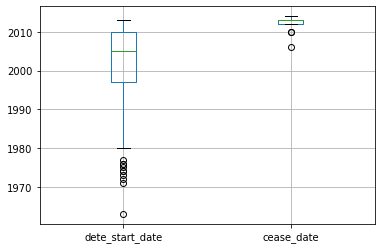

In [21]:
# import matplotlib library to plot data
import matplotlib.pyplot as plt
%matplotlib inline

# plot dete survey's 'dete_start_date' and 'cease date' columns on a box and whisker plot 
df_2.boxplot(column= ['dete_start_date', 'cease_date'])

<AxesSubplot:>

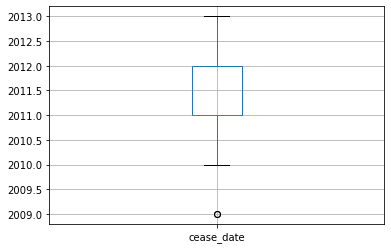

In [22]:
# plot tafe survey's 'cease date' columns on a box and whisker plot 
tafe_resignations.boxplot(column=['cease_date'])

There are no real issues with the data after cleaning the columns. At DEFE, most of the cease date occurred between 2012-2013. For TAFE, it seems most of the cease dates happened betwen 2011-2012. 

# TAFE - Creating a 'Start Date' Column

Now to see how long each employee stayed at each respective company, an issue arises being that TAFE doesnt have a start date column so ones needs to be made. 

In [23]:
# Create a new column for years of employment in DETE's data set called 'institute_service'
df_2['institute_service'] = df_2['cease_date'] - df_2['dete_start_date'] #subtract 'cease date' column from "start_date"
df_2['institute_service'].value_counts(dropna = False).sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
NaN     38
Name: institute_service, dtype: int64

I added a column called 'Institute_service' to the dete database which outlines years of service at the company before resignation. This was done by subtracting the year in start dates from the years in cease dates.

In [24]:
df_2['institute_service'].dropna(inplace=True)
df_2['institute_service'].value_counts(dropna=False)

NaN     38
5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
2.0     14
9.0     14
7.0     13
8.0      8
13.0     8
15.0     7
20.0     7
14.0     6
12.0     6
17.0     6
22.0     6
10.0     6
18.0     5
16.0     5
11.0     4
24.0     4
23.0     4
19.0     3
21.0     3
32.0     3
39.0     3
26.0     2
30.0     2
25.0     2
28.0     2
36.0     2
49.0     1
27.0     1
34.0     1
29.0     1
35.0     1
31.0     1
33.0     1
42.0     1
38.0     1
41.0     1
Name: institute_service, dtype: int64

In [25]:
# Count values in the 'institute_service' column
tafe_resignations['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

# Identify Dissatisfied Employees

Now, that there's a column in both data sets for years of employment, I can begin to identify which employees were dissatisfied before resigning. 

To identify dissatisfied employees in TAFE resignations, I will create a function to take all the values from 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' and assign a True/False value to that ID. The True/False value will be appended to a new column called 'dissatisfied'.

In [26]:
# Count values in 'Contributing Factors. Dissatisfaction' column 
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [27]:
# Count values in 'Contributing Factors. Job Dissatisfaction' column
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

I will now define a function that can be applied to our 'dissatisfied' column' to map our values as True/False/NaN

In [28]:
# Define a function to updates values in the contributing factors column as True, False, or NaN
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    else: 
        return True 

tafe_diss_factors = ['Contributing Factors. Job Dissatisfaction',
                     'Contributing Factors. Dissatisfaction']
tafe_resignations[tafe_diss_factors].applymap(update_vals)

tafe_resignations_up = tafe_resignations.copy()

tafe_resignations_up['dissatisfied'] = tafe_resignations[tafe_diss_factors].applymap(update_vals).any(axis=1,skipna=False)

Count the unique values in the new column

In [29]:
# Check the unique values in the new column
tafe_resignations_up['dissatisfied'].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

Also, want to check if the column was appended to the data set

In [30]:
# Check to see that the 'dissatisfied' column was appended successfully
tafe_resignations_up.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


Also take a look at column descriptions.

In [31]:
# check description of our new column
tafe_resignations_up['dissatisfied'].describe()

count       332
unique        2
top       False
freq        241
Name: dissatisfied, dtype: object

In [32]:
# Create new database as a copy of our DETE data set to add our dissatisfaction columns to
dete_resignations_up = df_2.copy()
dete_diss_factors = ['job_dissatisfaction','dissatisfaction_with_the_department',
                     'physical_work_environment','lack_of_recognition','lack_of_job_security',
                     'work_location','employment_conditions','work_life_balance','workload']

dete_resignations_up[dete_diss_factors].describe()

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
count,311,311,311,311,311,311,311,311,311
unique,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False
freq,270,282,305,278,297,293,288,243,284


Now, I can put all off our collected data into one column

In [33]:
# Create a new column called 'dissatisfied' that populates a True or False value based on if they were not happy when they quit
dete_resignations_up['dissatisfied'] = dete_resignations_up[dete_diss_factors].any(axis=1,skipna=False)
dete_resignations_up['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

Quick check to see if it was successful

In [34]:
# Check to see that the new column was successfully appended
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False


Changes to both databases were made by identifying which of the employees that resigned were dissatisfied. This was done by added a new column detailing the dissatisfication as either NaN, True, or False to both databases which helps to easily identify which employees were dissatisfied and resigned as a result. 

# Combine the Data

Now that both data sets are cleaned and clearly show if an employee was dissatisfied with their employer when he/she resigned, it is time to combine the data.

I can combine our data sets by concatenating the updated TAFE data set to the updated DETE data set. Beforehand, I will add a new column called 'institute' so there is an easy distinction that can be made between if the data belongs to DETE or TAFE. I will also drop any unnecessary columns for the analysis.

In [35]:
# Create new column called 'institute' to differentiate between the data from each data set
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

# Concatenate the data sets together into one for analysis
combined = pd.concat([dete_resignations_up,tafe_resignations_up],
                     ignore_index=True)

combined_updated = combined.dropna(axis=1, thresh=500).copy() # drop columns with less than 500 non null values
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(2), object(8)
memory usage: 51.0+ KB


The two respective datasets were concatenated and columns with less than 500 non null values were dropped. The results is now a single dataframe with 10 columns and 651 entries.

In [36]:
# check value counts in new combined data set
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
12.0                   6
14.0                   6
17.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
39.0                   3
19.0                   3
32.0                   3
21.0                   3
26.0                   2
25.0                   2
28.0                   2
36.0                   2
30.0                   2


# Clean the Service Column 

The column above contains values in two different kind of form. Organized like this, this data is inconsistent for analysis; so I will streamline the values in the columns by regrouping as followed below:
- New: Less than 3 years at a company

- Experienced: 3-6 years at a company

- Established: 7-10 years at a company

- Veteran: 11 or more years at a company

To clean our service column, I will extract the year from each value present in the 'institute_service' column so that every value has the same form; then create a function that maps each of those value into the career stages mentioned above and added to a newly created column(service_cat).

In [37]:
# check value count
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
12.0                   6
14.0                   6
17.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
39.0                   3
19.0                   3
32.0                   3
21.0                   3
26.0                   2
25.0                   2
28.0                   2
36.0                   2
30.0                   2


I will convert the years of service values and convert the type to float.

In [38]:
# Extract the years of service and convert values to float
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)
combined_updated['institute_service'] = combined_updated['institute_service'].str.extract(r'(\d+)')
combined_updated['institute_service'] = combined_updated['institute_service'].astype(float)

Define a function to convert years of service to categories and place the respective values in each.

In [39]:
# Convert years of service to categories
def stages(value):
    if value < 3:
        return 'New'
    elif value >= 3 and value <= 6:
        return 'Experienced'
    elif value > 6 and value <= 10:
        return 'Established'
    elif value > 10:
        return 'Veteran' 
    else:
        return np.nan
    
combined_updated['service_cat'] = combined_updated['institute_service'].apply(stages)

Quick check to see if the function was applied to our data set. 

In [40]:
# quick check to see that changes were made successfully
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

# Analyzing Which Employees Were Dissatisfied

A little more clean up to remove the NaN values and an initial analysis can be performed. I will replace the NaN values with the most frequent value in the column. Next, I will calculate the percentage of employees that were dissatisfied when he/she resigned and plot the results. 

In [41]:
# Check top value to convert NaN values to 
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

False is the top value in the 'dissatisfied' column so NaN values will be converted to False values

In [42]:
# Convert NaN values to False values
combined_updated['dissatisfied'].fillna(value=False,inplace=True)

Check if the conversion was successful

In [43]:
# Check to see it if was successful
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

Now to calculate our percentages and plot the results

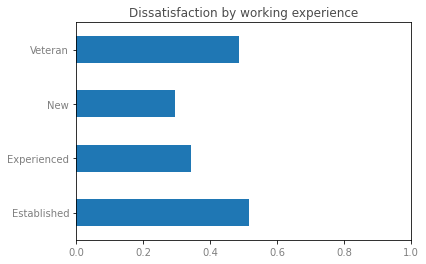

In [44]:
# Calculate percentages of employees that resigned due to dissatisfaction in each category
pivot_table = combined_updated.pivot_table(values='dissatisfied',
                                           index='service_cat')

# Plot the results
pivot_table.plot(kind='barh',legend=None) 
plt.xlim(0,1)
plt.xticks(alpha=0.5)
plt.ylabel('')
plt.yticks(alpha=0.5)
plt.title('Dissatisfaction by working experience',alpha=0.7)
plt.show()

Based off the plot generated above, employees with 7 or more years of service are most likely to resign from dissatisfaction with the company than employees with less than 7 years.  

# Dissatisfied Employees by Specific Company

As seen above, experienced and veteran employees were more likely to resign due to dissatisfication in total. I also want to take a look at the companies individually to check which company has a higher rate of resignation due to dissatisfaction and which category of employee is more likely to leave. 

In [45]:
# make a copy to not disrupt our original dataset
dete_resign_up_copy = dete_resignations_up.copy()

# Convert years of service to a float
dete_resign_up_copy['institute_service'] = dete_resign_up_copy['institute_service'].astype(str)
dete_resign_up_copy['institute_service'] = dete_resign_up_copy['institute_service'].str.extract(r'(\d+)')
dete_resign_up_copy['institute_service'] = dete_resign_up_copy['institute_service'].astype(float)

I will take the function that I created earlier, and apply it to my copy DETE data set. 

In [46]:
dete_resign_up_copy['service_cat'] = dete_resign_up_copy['institute_service'].apply(stages)

Check if the column was successfully created

In [47]:
# Check values 
dete_resign_up_copy['service_cat'].value_counts(dropna=False)

Veteran        100
Experienced     76
New             56
Established     41
NaN             38
Name: service_cat, dtype: int64

# Dissatisfied Employee's at DETE

Now, I will clean up the NaN values, calculate the percentage, and plot the results like above. 

In [48]:
# Check top value to convert NaN values to 
dete_resign_up_copy['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

There doesn't seem to be any NaN values in our 'dissatisfied column

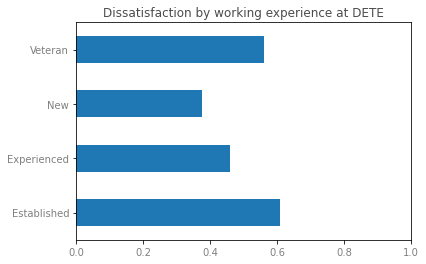

In [49]:
# Calculate percentages of employees that resigned due to dissatisfaction in each category
pivot_table_2 = dete_resign_up_copy.pivot_table(values='dissatisfied',
                                           index='service_cat')

# Plot the results
pivot_table_2.plot(kind='barh',legend=None) 
plt.xlim(0,1)
plt.xticks(alpha=0.5)
plt.ylabel('')
plt.yticks(alpha=0.5)
plt.title('Dissatisfaction by working experience at DETE',alpha=0.7)
plt.show()

Based on the plot above, employees with 7 or more years of service at DETE are most likely to resign due to dissatisfaction. The plot is almost exactly the same as our combination data set, although the values are higher in the individual DETE plot. Let's take a took at the TAFE data set individually and see what inferences can be drawn from the three plots together. 

# Dissatisfied Employees at TAFE

I will repeat the steps I took above on the TAFE survey data set individually 

In [50]:
# make a copy to not disrupt our original dataset
tafe_resign_up_copy = tafe_resignations_up.copy()

# Convert years of service to a float
tafe_resign_up_copy['institute_service'] = tafe_resign_up_copy['institute_service'].astype(str)
tafe_resign_up_copy['institute_service'] = tafe_resign_up_copy['institute_service'].str.extract(r'(\d+)')
tafe_resign_up_copy['institute_service'] = tafe_resign_up_copy['institute_service'].astype(float)

Add the years of service values into theier respective categories

In [51]:
tafe_resign_up_copy['service_cat'] = tafe_resign_up_copy['institute_service'].apply(stages)

In [52]:
# Check values 
tafe_resign_up_copy['service_cat'].value_counts(dropna=False)

New            137
Experienced     96
NaN             50
Veteran         36
Established     21
Name: service_cat, dtype: int64

Check the NaN values in the 'dissatisfied' column

In [53]:
# Check top value to convert NaN values to 
tafe_resign_up_copy['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

False is the highest value so I will convert the NaN values to False

In [54]:
# Convert NaN values to False values
tafe_resign_up_copy['dissatisfied'].fillna(value=False,inplace=True)

In [55]:
# Check to see it if was successful
tafe_resign_up_copy['dissatisfied'].value_counts(dropna=False)

False    249
True      91
Name: dissatisfied, dtype: int64

Now that I've converted the values, I can calculate the percentages and plot the results

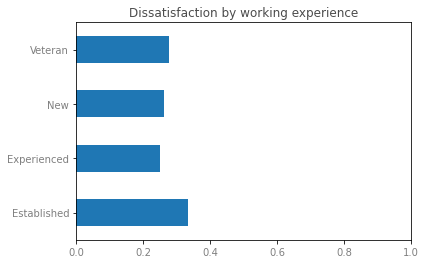

In [56]:
# Calculate percentages of employees that resigned due to dissatisfaction in each category
pivot_table_3 = tafe_resign_up_copy.pivot_table(values='dissatisfied',
                                           index='service_cat')

# Plot the results
pivot_table_3.plot(kind='barh',legend=None) 
plt.xlim(0,1)
plt.xticks(alpha=0.5)
plt.ylabel('')
plt.yticks(alpha=0.5)
plt.title('Dissatisfaction by working experience',alpha=0.7)
plt.show()

Based on the plot above, like the other two plots, employees with 7 or more years of experience resigned due to dissatisfaction. Let's display all the plots together and draw some inferences.

# Conclusion

In this project, we cleaned and analyzed two exit surveys from DETE and TAFE individually and combined to assess which employees were resigning due to dissatisfaction based on years of service. The conclusion that was drawn was that employees with 7 or more years of experience were more likely to resign due to dissatisfaction than their younger counterparts. This was displayed between the three plots as all three were almost all alike, with the only difference between the plots being the values displayed. DETE had a higher percentage of employees resigning compared to TAFE with the combined plot falling between them which makes sense as it is in essence a middle ground between both plots. The most likely reason for DETE having a higher percentage is that it had almost double the amount of dissatisfied employees than TAFE did.